In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
%matplotlib inline

#Preparing Dataset

##Deskripsi Data

There are 3 types of input features:


*   Objective: factual information   
*   Examination: results of medical examination
*   Subjective: information given by the patient.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Referensi Dataset:
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

##Proses Load Dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##Explore Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Dataset terdiri dari 13 kolom dan 70000 baris dimana semuanya bertipe numerik, 12 integer dan 1 float

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Gunakan describe untuk menampilkan statistik seperti jumlah data, mean atau rata-rata, standar deviasi, nilai minimum, Q1, Q2, Q3, dan nilai maximum setiap kolom

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Dilihat di atas, tidak ada kolom yang kosong

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6508f02e10>,
      dtype=object)

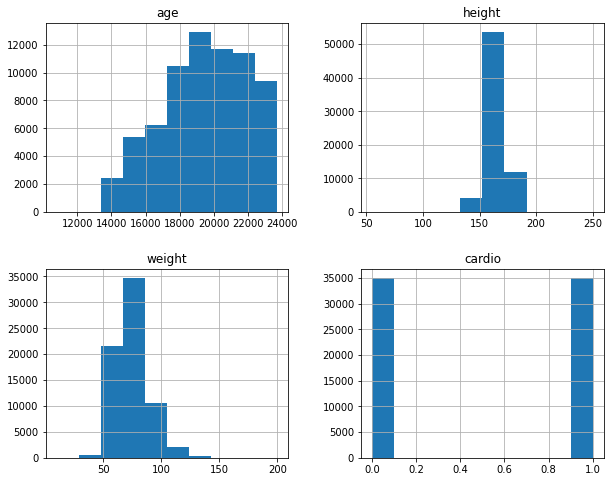

In [7]:
column = ['age', 'height','weight','cardio']
df[column].hist(figsize=(10,8))

Bar chart di atas digunakan untuk mengetahui persebaran data apakah persebaran normal atau skewed. Untuk age dan weight perseberan datanya skewed ke kanan untuk age dan ke kiri untuk weight

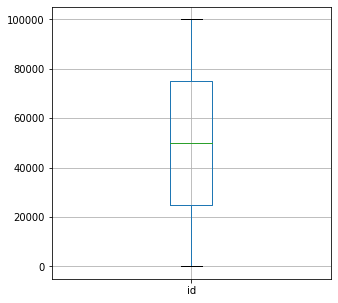

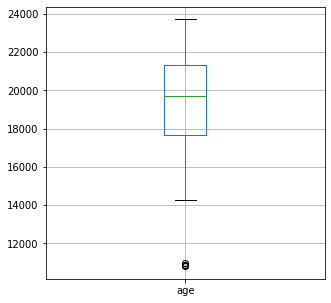

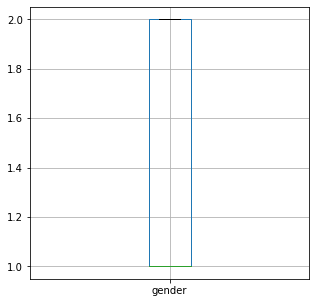

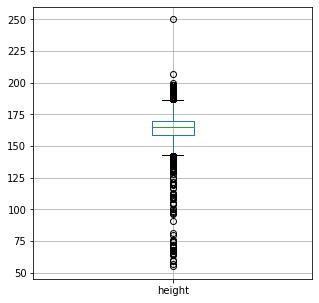

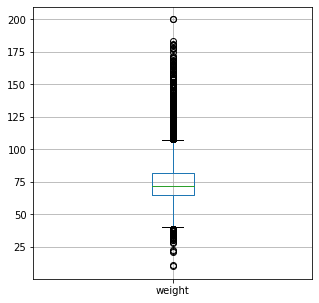

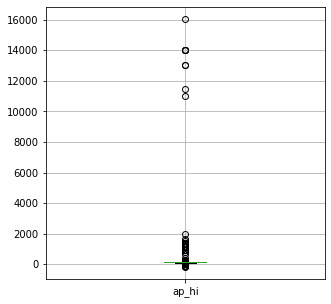

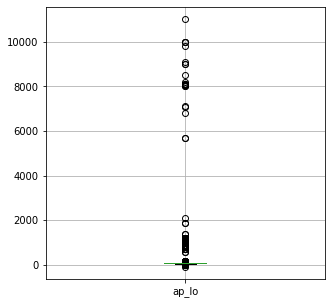

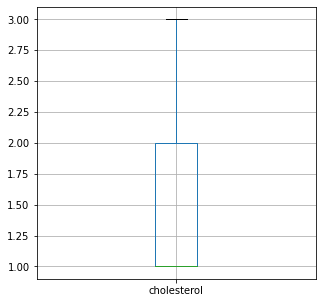

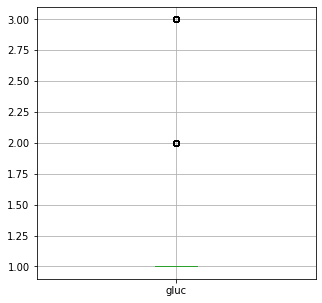

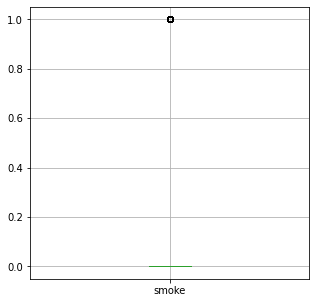

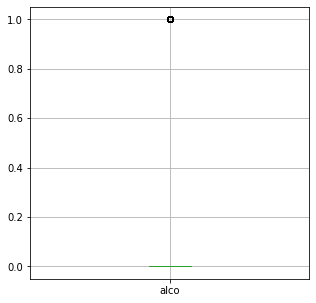

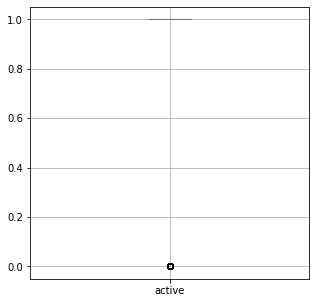

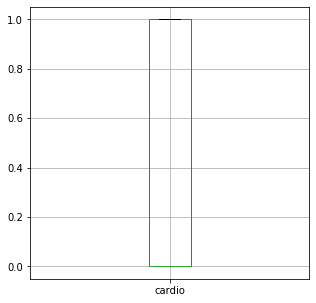

In [8]:
numeric_cols = [col for col in df.columns if df[col].dtype != "object"]
for column in numeric_cols:
    plt.figure(figsize=(5,5))
    df.boxplot([column])

Boxplot diatas digunakan untuk melihat apakah setiap kolom mempunyai outlier, sehingga kita bisa tau apa yang harus dilakukan terhadap datanya nanti

##Data Cleansing

In [9]:
df.pop('id')

0            0
1            1
2            2
3            3
4            4
         ...  
69995    99993
69996    99995
69997    99996
69998    99998
69999    99999
Name: id, Length: 70000, dtype: int64

In [10]:
df['age'] = (df['age'] / 365).round().astype('int')

Proses mengubah umur dari yang awalnya hari menjadi tahun

In [11]:
df = df.loc[df['ap_hi'] >= 70]
df = df.loc[df['ap_hi'] <= 240]

In [12]:
df = df.loc[df['ap_lo'] <= 150]
df = df.loc[df['ap_lo'] >= 50]

#Visualisasi Data

##Proses Mencari Variabel Paling Berpengaruh Terhadap CVD

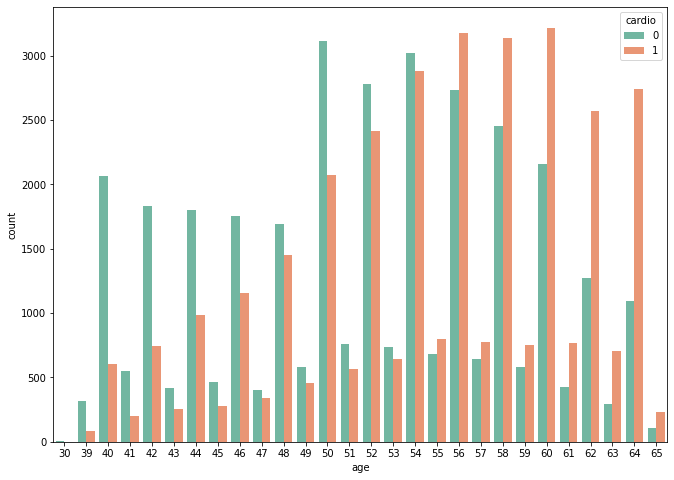

In [13]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

Bar chart diatas digunakan untuk melihat, pada usia berapakah jumlah orang yang menderita CVD atau Cardiovascular Disease lebih banyak daripada orang yang sehat. Bisa dikatakan orang yang berumur mulai dari 55 lebih banyak yang menderita CVD daripada yang sehat

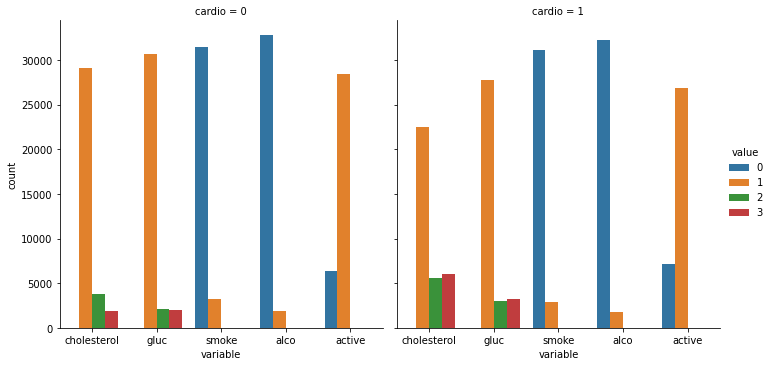

In [14]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

Bar chart diatas untuk menganalisis, faktor apa yang paling berpengaruh terhadap seseorang yang menderita penyakit CVD. Bar di atas menunjukkan, orang yang menderita CVD memiliki kolestrol dan kadar glukosa yang lebih banyak ketimbang orang sehat. Ini bisa dilihat dari bar merah dan bar hijau pada kolestrol dan gluc yang lebih banyak dari orang sehat.

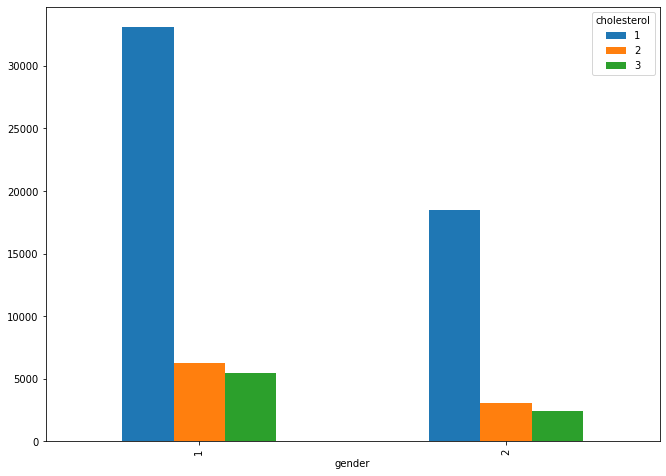

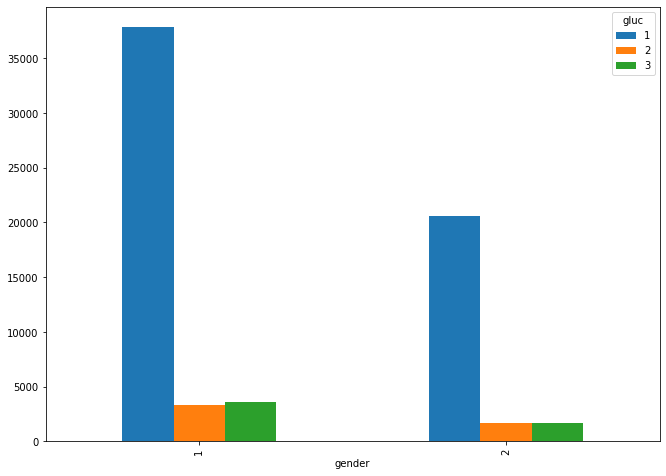

In [15]:
pd.crosstab(df['gender'],df['cholesterol']).plot.bar()
pd.crosstab(df['gender'],df['gluc']).plot.bar()

Berdasarkan penjelasan bar sebelumnya, bahwa orang yang menderita CVD memiliki kolesterol dan glukosa yang lebih tinggi dari orang normal maka dibuat bar chart di atas. Bar chart di atas digunakan untuk menghetahui apakah laki-laki atau perempuan yang memiliki kadar kolesterol dan glukosa yang lebih tinggi. Menurut bar chart di atas 
1. Perempuan lebih banyak yang memiliki kadar kolesterol di atas normal.
2. Perempuan lebih banyak yang memiliki kadar glukosa di atas normal.

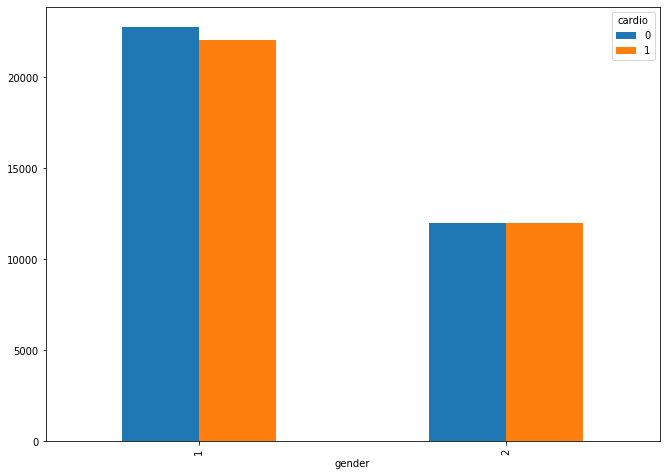

In [16]:
pd.crosstab(df['gender'],df['cardio']).plot.bar()

  Dari bar chart di atas bisa dikatakan kalau laki-laki lebih banyak yang menderita CVD dibandingkan yang sehat

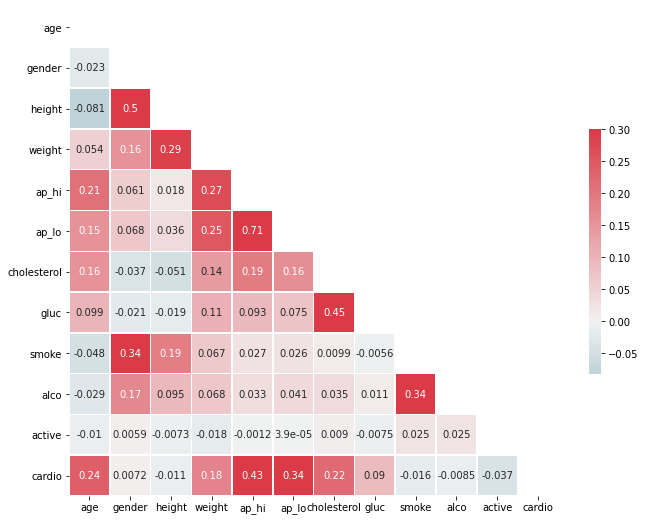

In [17]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Berdasarkan matrix korelasi di atas setiap variabel tidak terlalu terikat atau berkorelasi

#Feature Engineering

In [18]:
df.loc[(df['ap_hi'] < 120) & (df['ap_lo'] <= 80), 'blood_pressure'] = 'Normal'
df.loc[(df['ap_hi'] >= 120) & (df['ap_hi'] < 130) & (df['ap_lo'] <= 80), 'blood_pressure'] = 'Elevated'
df.loc[(df['ap_hi'] >= 130) & (df['ap_hi'] < 139) | (df['ap_lo'] > 80) & (df['ap_lo'] <= 89), 'blood_pressure'] = 'Stage_1'
df.loc[(df['ap_hi'] >= 140) & (df['ap_hi'] <= 180) | (df['ap_lo'] >= 90) & (df['ap_lo'] <= 120), 'blood_pressure'] = 'Stage_2'
df.loc[(df['ap_hi'] > 180) & (df['ap_lo'] > 120), 'blood_pressure'] = 'Hypertensive_Crisis'

In [19]:
df['height'] = df['height']/100

In [20]:
df['BMI'] = df['weight'] / (df['height']**2)

In [21]:
df.loc[(df['BMI'] < 18.5), 'BMI_category'] = 'below_normal'
df.loc[(df['BMI'] >= 18.5)&(df['BMI'] < 25), 'BMI_category'] = 'normal'
df.loc[(df['BMI'] >= 25)&(df['BMI'] < 30), 'BMI_category'] = 'overweight'
df.loc[(df['BMI'] >= 30)&(df['BMI'] < 35), 'BMI_category'] = 'class_1'
df.loc[(df['BMI'] >= 35)&(df['BMI'] < 40), 'BMI_category'] = 'class_2'
df.loc[(df['BMI'] >= 40), 'BMI_category'] = 'class_3'

In [22]:
pop = ['age','height','weight','ap_hi','ap_lo','BMI']
df = df.drop(pop,axis=1)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

gender            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
blood_pressure    0
BMI_category      0
dtype: int64

In [25]:
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure,BMI_category
0,2,1,1,0,0,1,0,Normal,normal
1,1,3,1,0,0,1,1,Stage_2,class_1
2,1,3,1,0,0,0,1,Stage_1,normal
3,2,1,1,0,0,1,1,Stage_2,overweight
4,1,1,1,0,0,0,0,Normal,normal


#Label Encoding

In [26]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

#Split Dataset

In [27]:
y = df.pop('cardio')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2,random_state=42)

#Build Model

In [29]:
num_folds = 10
seed = 7
scoring = 'roc_auc'

##RANDOM FOREST

In [30]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC : ',roc_auc_score(y_test, predictions))

[[5393 1471]
 [2481 4390]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      6864
           1       0.75      0.64      0.69      6871

    accuracy                           0.71     13735
   macro avg       0.72      0.71      0.71     13735
weighted avg       0.72      0.71      0.71     13735

ROC :  0.7123053306878441


##KNN

In [31]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC : ',roc_auc_score(y_test, predictions))

[[4951 1913]
 [2358 4513]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6864
           1       0.70      0.66      0.68      6871

    accuracy                           0.69     13735
   macro avg       0.69      0.69      0.69     13735
weighted avg       0.69      0.69      0.69     13735

ROC :  0.6890590231943383


##SVM

In [32]:
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC : ',roc_auc_score(y_test, predictions))

[[5244 1620]
 [2236 4635]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6864
           1       0.74      0.67      0.71      6871

    accuracy                           0.72     13735
   macro avg       0.72      0.72      0.72     13735
weighted avg       0.72      0.72      0.72     13735

ROC :  0.7192801558796319


##GBM

In [33]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC : ',roc_auc_score(y_test, predictions))

[[5333 1531]
 [2303 4568]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6864
           1       0.75      0.66      0.70      6871

    accuracy                           0.72     13735
   macro avg       0.72      0.72      0.72     13735
weighted avg       0.72      0.72      0.72     13735

ROC :  0.7208876921482438
